# Looi Kah Fung_Assignment 1_P-COM0049/22

CRISP-DM Methodology 
#Business understanding
The dataset comes from BMJ Journals, BMJ Open Gastroenterology. The dataset consists of 450 observations and 27 attributes. The background of the study Northern England has been experiencing a persistent rise in the number of primary liver cancers, largely driven by an increasing incidence of hepatocellular carcinoma (HCC) secondary to alcohol-related liver disease and non-alcoholic fatty liver disease. Here we review the effect of the COVID-19 pandemic on primary liver cancer services and patients in our region.
Objective To assess the impact of the COVID-19 pandemic on patients with newly diagnosed liver cancer in our region.

# Data Understanding 
Cancer: Cancer flag [Y/N]
Year: Categorical [Prepandemic (March 2019–February 2020)/Postpandemic(March 2020–February 2021)]
Month: Month of the year 1-12
Bleed: Spontaneous tumour haemorrhage [Y/N]
Mode Presentation: Surveillance, Incidental, or Symptomatic
Age: Age of the patitent
Gender: Male or Female [M/F]
Etiology: manner of causation of a disease or condition. Either "No established CLD" (chronic liver disease), "ARLD" (alcohol-related liver disease), "NAFLD" (non-alcoholic fatty liver disease), "HCV" (hepatitis C virus), "HH" (hereditary haemochromatosis), "PBC/AIH" (primary biliary cholangitis/autoimmune hepatitis), "HBV" (hepatitis B virus), or "Other".
Cirrhosis: Underlying liver disease [Y/N]
Size: Tumour diameter in mm
HCC TNM Stage: Hepatocellular carcinoma Tumour node metastasis Stage ("I", "II", "IIIA+IIIB", "IV")
HCC BCLC Stage: Hepatocellular carcinoma Barcelona Clinic for Liver Cancer Stage ("0", "A", "B", "C", "D")
ICC TNM Stage: Intrahepatic cholangiocarcinoma Tumour node metastasis Stage ("I", "II", "III", "IV")
Treatment grps: First-line treatment received ["OLTx" (orthotopic liver transplantation), "Resection", "Ablation", "TACE"" (transarterial chemoembolisation), "SIRT" (selective internal radiation therapy), "Medical", "Supportive care"]
Survival from MDM: Survival from Multidisciplinary meeting
Alive Dead: "Alive", "Dead"
Type of incidental finding: ("Primary care-routine", "Secondary care-routine", "Primary care-acute", "Secondary care-acute")
Surveillance programme: Patient in a formal surveillance programme ("Y", "N")
Surveillance effectiveness: Surveillance adherence over previous year ("Consistent", "Inconsistent", "Missed")
Mode of surveillance detection: Mode of incident surveillance test ["US" (ultrasound), "AFP alone" (alpha-fetoprotein alone), "CT/MRI"]
Time diagnosis 1st Tx:
Date incident surveillance scan: ("Y", "N")
PS: Performance status [0, 1, 2, 3, 4]
Time MDM 1st treatment: Time to Multidisciplinary meeting 1st treatment
Time decision to treat 1st treatment: Time decision to treat 1st treatment
Prev known cirrhosis: ["Y", "N"]
Months from last surveillance: Months from last surveillance

https://www.kaggle.com/datasets/fedesoriano/covid19-effect-on-liver-cancer-prediction-dataset

In [1]:
!pip install scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np 


In [2]:
#CP-1252 is an 8-bit character encoding based on ASCII (identical up to code point 127). This is the default codepage for graphical applications under Windows.
df= pd.read_csv("covid-liver.csv",encoding='cp1252')

In [3]:
#print the 1st 5 rows 
df.head(5)

Cancer         Year  Month Bleed Mode_Presentation  Age Gender Etiology  \
0      Y  Prepandemic      1     N      Surveillance   68      M    NAFLD   
1      Y  Prepandemic      1     N      Surveillance   70      M     ARLD   
2      Y  Prepandemic      1     N      Surveillance   64      M     ARLD   
3      Y  Prepandemic      1     N        Incidental   73      M     ARLD   
4      Y  Prepandemic      1     N        Incidental   66      F     ARLD   

  Cirrhosis  Size  ... Surveillance_programme Surveillance_effectiveness  \
0         Y  22.0  ...                      Y                 Consistent   
1         Y  40.0  ...                      Y                 Consistent   
2         Y  52.0  ...                      Y                 Consistent   
3         Y  80.0  ...                      N                        NaN   
4         Y  60.0  ...                      N                        NaN   

  Mode_of_surveillance_detection Time_diagnosis_1st_Tx  \
0                             US                  0.47   
1                             US                   NaN   
2                             US                   NaN   
3                            NaN                   NaN   
4                            NaN                   NaN   

   Date_incident_surveillance_scan   PS Time_MDM_1st_treatment  \
0                              NaN  0.0                    0.7   
1                              NaN  2.0                    NaN   
2                              NaN  0.0                    NaN   
3                              NaN  2.0                    NaN   
4                              NaN  0.0                    NaN   

  Time_decisiontotreat_1st_treatment Prev_known_cirrhosis  \
0                                NaN                    Y   
1                                NaN                    Y   
2                                NaN                    Y   
3                                NaN                    Y   
4                                NaN                    Y   

  Months_from_last_surveillance  
0                      7.333333  
1                      4.033333  
2                      5.900000  
3                           NaN  
4                           NaN  

[5 rows x 27 columns]

In [70]:
#describe the data
df.describe()

Month  Bleed         Age  Etiology  Cirrhosis        Size  \
count  450.000000  450.0  450.000000     450.0      450.0  448.000000   
mean     6.757778    0.0   70.371111       0.0        0.0   52.676339   
std      3.449476    0.0   10.572586       0.0        0.0   38.445931   
min      1.000000    0.0   27.000000       0.0        0.0   10.000000   
25%      4.000000    0.0   65.000000       0.0        0.0   25.000000   
50%      7.000000    0.0   72.000000       0.0        0.0   40.000000   
75%     10.000000    0.0   78.000000       0.0        0.0   70.000000   
max     12.000000    0.0   96.000000       0.0        0.0  220.000000   

       HCC_TNM_Stage  HCC_BCLC_Stage  Treatment_grps  Survival_fromMDM  ...  \
count          450.0           450.0           450.0        450.000000  ...   
mean             0.0             0.0             0.0         12.696622  ...   
std              0.0             0.0             0.0          9.703300  ...   
min              0.0             0.0             0.0         -0.030000  ...   
25%              0.0             0.0             0.0          4.032500  ...   
50%              0.0             0.0             0.0         10.785000  ...   
75%              0.0             0.0             0.0         21.282500  ...   
max              0.0             0.0             0.0         32.770000  ...   

               PS  Prev_known_cirrhosis  Bleed_Imputed  Etiology_Imputed  \
count  450.000000                 450.0          450.0             450.0   
mean     1.224444                   0.0            0.0               0.0   
std      1.027821                   0.0            0.0               0.0   
min      0.000000                   0.0            0.0               0.0   
25%      0.000000                   0.0            0.0               0.0   
50%      1.000000                   0.0            0.0               0.0   
75%      2.000000                   0.0            0.0               0.0   
max      4.000000                   0.0            0.0               0.0   

       Cirrhosis_Imputed  Surveillance_programme_Imputed  \
count              450.0                           450.0   
mean                 0.0                             0.0   
std                  0.0                             0.0   
min                  0.0                             0.0   
25%                  0.0                             0.0   
50%                  0.0                             0.0   
75%                  0.0                             0.0   
max                  0.0                             0.0   

       Prev_known_cirrhosis_Imputed  HCC_TNM_Stage_Imputed  \
count                         450.0                  450.0   
mean                            0.0                    0.0   
std                             0.0                    0.0   
min                             0.0                    0.0   
25%                             0.0                    0.0   
50%                             0.0                    0.0   
75%                             0.0                    0.0   
max                             0.0                    0.0   

       HCC_BCLC_Stage_Imputed  Treatment_grps_Imputed  
count                   450.0                   450.0  
mean                      0.0                     0.0  
std                       0.0                     0.0  
min                       0.0                     0.0  
25%                       0.0                     0.0  
50%                       0.0                     0.0  
75%                       0.0                     0.0  
max                       0.0                     0.0  

[8 rows x 21 columns]

In [71]:
!pip install pandas-profiling
from pandas_profiling import ProfileReport

In [6]:
ProfileReport(df, title="Pandas Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
#retrieve the preliminary info of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cancer                          450 non-null    object 
 1   Year                            450 non-null    object 
 2   Month                           450 non-null    int64  
 3   Bleed                           450 non-null    int32  
 4   Mode_Presentation               450 non-null    object 
 5   Age                             450 non-null    int64  
 6   Gender                          450 non-null    object 
 7   Etiology                        450 non-null    int32  
 8   Cirrhosis                       450 non-null    int32  
 9   Size                            448 non-null    float64
 10  HCC_TNM_Stage                   450 non-null    int32  
 11  HCC_BCLC_Stage                  450 non-null    int32  
 12  Treatment_grps                  450 

In [14]:
#Examine the missing values, there're null values across categorical and numerical features  
df.isnull().sum()

Cancer                                  0
Year                                    0
Month                                   0
Bleed                                 140
Mode_Presentation                       0
Age                                     0
Gender                                  0
Etiology                              139
Cirrhosis                             139
Size                                   50
HCC_TNM_Stage                         139
HCC_BCLC_Stage                        139
ICC_TNM_Stage                         311
Treatment_grps                          2
Survival_fromMDM                        0
Alive_Dead                              0
Type_of_incidental_finding            326
Surveillance_programme                139
Surveillance_effectiveness            333
Mode_of_surveillance_detection        352
Time_diagnosis_1st_Tx                 292
Date_incident_surveillance_scan       417
PS                                      2
Time_MDM_1st_treatment            

In [27]:
#Remove those columns that contain the proportion of missing values more than 50%. 
pct_null = df.isnull().sum()/len(df)
missing_features = pct_null[pct_null>0.50].index
df.drop(missing_features, axis=1, inplace=True)

In [28]:
#Feature has been reduced to 15 after removing features that are having null-value more than 50%.Loss of statistical power.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cancer                  450 non-null    object 
 1   Year                    450 non-null    object 
 2   Month                   450 non-null    int64  
 3   Bleed                   310 non-null    object 
 4   Mode_Presentation       450 non-null    object 
 5   Age                     450 non-null    int64  
 6   Gender                  450 non-null    object 
 7   Etiology                311 non-null    object 
 8   Cirrhosis               311 non-null    object 
 9   Size                    400 non-null    float64
 10  HCC_TNM_Stage           311 non-null    object 
 11  HCC_BCLC_Stage          311 non-null    object 
 12  Treatment_grps          448 non-null    object 
 13  Survival_fromMDM        450 non-null    float64
 14  Alive_Dead              450 non-null    ob

#Handling missing values - categorical features and numerical features
https://towardsdatascience.com/handling-missing-data-like-a-pro-part-2-imputation-methods-eabbf10b9ce4
https://jamesrledoux.com/code/imputation

https://medium.com/analytics-vidhya/ways-to-handle-categorical-column-missing-data-its-implementations-15dc4a56893

In [69]:
#Examine the missing values, there're null values across categorical and numerical features  2.0
df.isnull().sum()

Cancer                            0
Year                              0
Month                             0
Bleed                             0
Mode_Presentation                 0
Age                               0
Gender                            0
Etiology                          0
Cirrhosis                         0
Size                              2
HCC_TNM_Stage                     0
HCC_BCLC_Stage                    0
Treatment_grps                    0
Survival_fromMDM                  0
Alive_Dead                        0
Surveillance_programme            0
PS                                0
Prev_known_cirrhosis              0
Bleed_Imputed                     0
Etiology_Imputed                  0
Cirrhosis_Imputed                 0
Surveillance_programme_Imputed    0
Prev_known_cirrhosis_Imputed      0
HCC_TNM_Stage_Imputed             0
HCC_BCLC_Stage_Imputed            0
Treatment_grps_Imputed            0
dtype: int64

In [46]:
Numerical_var =['Size']
Numerical_var_mode =['PS']
Categorical_var =['Bleed','Etiology','Cirrhosis','Surveillance_programme','Prev_known_cirrhosis','HCC_TNM_Stage','HCC_BCLC_Stage','Treatment_grps']


In [66]:
#Fillna for numerical features
df['Size']=df['Size'].fillna(df.groupby(['Age','Gender'])['Size'].transform('median'))
df['PS']. fillna(df['PS'].mode()[0],inplace= True) 

In [67]:
# Function to impute most occured category and add importance vairable
def impute_nan_add_vairable(df,ColName):
    #1. add new column and replace if category is null then 1 else 0
    df[ColName] =   np.where(df[ColName].isnull(),1,0)
    
    # 2. Take most occured category in that vairable (.mode())
    
    Mode_Category = df[ColName].mode()[0]
    
    ## 2.1 Replace NAN values with most occured category in actual vairable
    
    df[ColName].fillna(Mode_Category,inplace=True)
# Call function to impute NAN values and add new importance feature
for Columns in Categorical_var:
    impute_nan_add_vairable(df,Columns)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cancer                          450 non-null    object 
 1   Year                            450 non-null    object 
 2   Month                           450 non-null    int64  
 3   Bleed                           450 non-null    int32  
 4   Mode_Presentation               450 non-null    object 
 5   Age                             450 non-null    int64  
 6   Gender                          450 non-null    object 
 7   Etiology                        450 non-null    int32  
 8   Cirrhosis                       450 non-null    int32  
 9   Size                            448 non-null    float64
 10  HCC_TNM_Stage                   450 non-null    int32  
 11  HCC_BCLC_Stage                  450 non-null    int32  
 12  Treatment_grps                  450 

In [59]:
Categorical_var_Imputed =['Bleed_Imputed','Etiology_Imputed','Cirrhosis_Imputed','Surveillance_programme_Imputed','Prev_known_cirrhosis_Imputed','HCC_TNM_Stage_Imputed','HCC_BCLC_Stage_Imputed','Treatment_grps_Imputed']
df.drop(Categorical_var_Imputed, axis=1)

Cancer         Year  Month  Bleed Mode_Presentation  Age Gender  Etiology  \
0        Y  Prepandemic      1      0      Surveillance   68      M         0   
1        Y  Prepandemic      1      0      Surveillance   70      M         0   
2        Y  Prepandemic      1      0      Surveillance   64      M         0   
3        Y  Prepandemic      1      0        Incidental   73      M         0   
4        Y  Prepandemic      1      0        Incidental   66      F         0   
..     ...          ...    ...    ...               ...  ...    ...       ...   
445      N     Pandemic     12      0       Symptomatic   72      F         0   
446      N     Pandemic     12      0       Symptomatic   63      M         0   
447      N     Pandemic     12      0       Symptomatic   79      F         0   
448      N     Pandemic     12      0       Symptomatic   84      F         0   
449      N     Pandemic     12      0        Incidental   80      F         0   

     Cirrhosis  Size  HCC_TNM_Stage  HCC_BCLC_Stage  Treatment_grps  \
0            0  22.0              0               0               0   
1            0  40.0              0               0               0   
2            0  52.0              0               0               0   
3            0  80.0              0               0               0   
4            0  60.0              0               0               0   
..         ...   ...            ...             ...             ...   
445          0  90.0              0               0               0   
446          0  75.0              0               0               0   
447          0  63.0              0               0               0   
448          0  65.0              0               0               0   
449          0  45.0              0               0               0   

     Survival_fromMDM Alive_Dead  Surveillance_programme   PS  \
0               32.73      Alive                       0  0.0   
1                3.03       Dead                       0  2.0   
2               14.97       Dead                       0  0.0   
3                1.40       Dead                       0  2.0   
4               32.50      Alive                       0  0.0   
..                ...        ...                     ...  ...   
445              1.20       Dead                       0  1.0   
446              9.67      Alive                       0  0.0   
447              1.47       Dead                       0  1.0   
448              1.67       Dead                       0  2.0   
449              7.27       Dead                       0  2.0   

     Prev_known_cirrhosis  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
..                    ...  
445                     0  
446                     0  
447                     0  
448                     0  
449                     0  

[450 rows x 18 columns]

In [60]:
 Bleed_Imputed                   450 non-null    int32  
 19  Etiology_Imputed                450 non-null    int32  
 20  Cirrhosis_Imputed               450 non-null    int32  
 21  Surveillance_programme_Imputed  450 non-null    int32  
 22  Prev_known_cirrhosis_Imputed    450 non-null    int32  
 23  HCC_TNM_Stage_Imputed           450 non-null    int32  
 24  HCC_BCLC_Stage_Imputed          450 non-null    int32  
 25  Treatment_grps_Imputed          450 non-null    int32  

SyntaxError: invalid syntax (Temp/ipykernel_7688/2147293408.py, line 1)

In [63]:
#count observations based on attribute 
#Mildly imbalanced dataset 
df['Cancer'].value_counts()

Y    310
N    140
Name: Cancer, dtype: int64

In [64]:
df.nunique()

Cancer                              2
Year                                2
Month                              12
Bleed                               1
Mode_Presentation                   3
Age                                54
Gender                              2
Etiology                            1
Cirrhosis                           1
Size                              100
HCC_TNM_Stage                       1
HCC_BCLC_Stage                      1
Treatment_grps                      1
Survival_fromMDM                  307
Alive_Dead                          2
Surveillance_programme              1
PS                                  5
Prev_known_cirrhosis                1
Bleed_Imputed                       2
Etiology_Imputed                    2
Cirrhosis_Imputed                   2
Surveillance_programme_Imputed      2
Prev_known_cirrhosis_Imputed        2
HCC_TNM_Stage_Imputed               2
HCC_BCLC_Stage_Imputed              2
Treatment_grps_Imputed              2
dtype: int64

Correlation Matrix 

(21.5, -0.5)

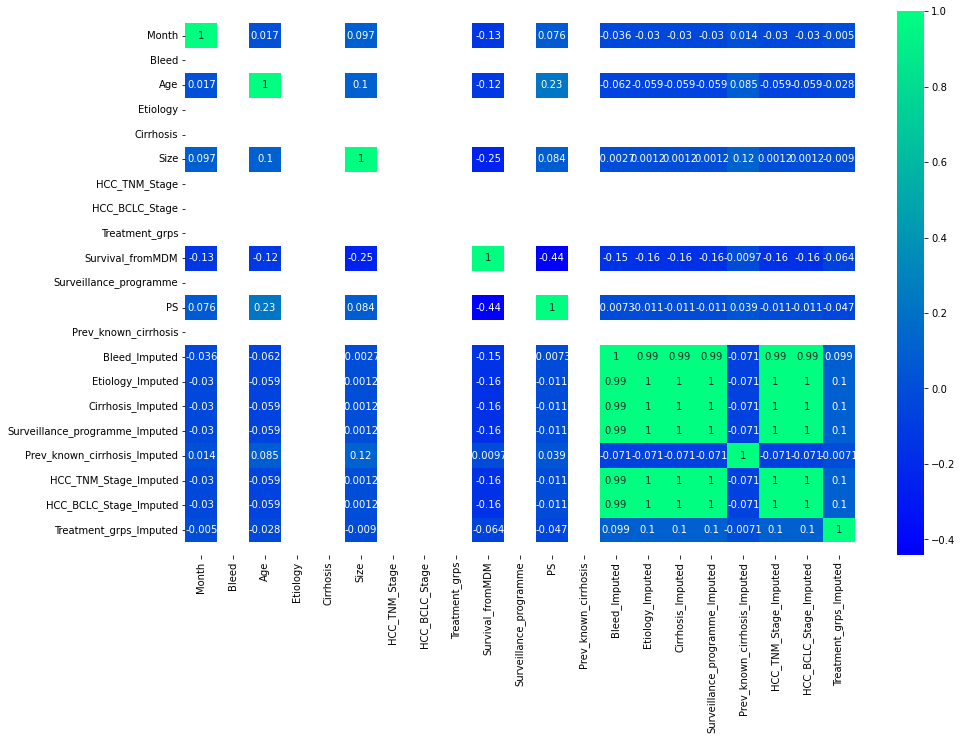

In [65]:
#correlations using heat map plot - CART(correlation, regression)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
ax= sns.heatmap(df.corr(),annot=True,cmap='winter',cbar=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top -0.5)

#Modelling 

In [23]:
#Training dataset 
#select all columns except the last one 
X= df.drop("Class", axis=1)
#set target categorical data label (6th attribute)
y= df["Class"]

#train-test split - 70/30 ratio
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42) #data imbalance, add a new argument stratify = y 

In [24]:
print('-------- x axis test ----------')
print(X_test)
print('-------- x axis train ---------')
print(X_train)
print('-------- y axis test ----------')
print(y_test)
print('-------- y axis train ---------')
print(y_train)
print('*******************************')

-------- x axis test ----------
     Native Speaker  Course instructor  Course  Semesterr  Class Size
76                2                  5       2          2          48
18                2                 13       3          1          10
82                2                 13       3          1          11
81                2                  9       2          2          39
143               2                  3       2          2          37
31                2                 18       5          2          19
78                1                 23       3          1          25
64                2                  7      11          2          13
55                2                  7      11          2          10
85                2                  7      11          1          20
45                2                  9       5          2          19
12                2                 18      21          2          29
36                2                  4      16          2 

In [25]:
y_train.value_counts()

3    36
1    35
2    34
Name: Class, dtype: int64

In [26]:
y_train.shape

(105,)

Evaluation

In [27]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
yfit = svm.predict(X_test)
yfit.shape

(46,)

Confusion Matrix

In [28]:
# import classification report metrices
from sklearn.metrics import classification_report

print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           1       0.38      0.64      0.47        14
           2       0.44      0.25      0.32        16
           3       0.31      0.25      0.28        16

    accuracy                           0.37        46
   macro avg       0.38      0.38      0.36        46
weighted avg       0.38      0.37      0.35        46



<AxesSubplot:>

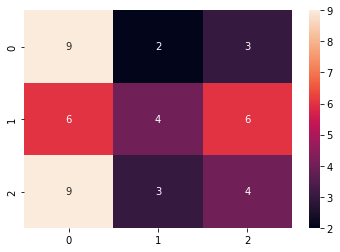

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib as plt
# predict the classes of new, unseen data
# Creates a confusion matrix
cm = confusion_matrix(y_test, yfit)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm)
# plot the confusion matrix
sns.heatmap(cm_df, annot=True, fmt='g')

In [30]:
from sklearn.model_selection import GridSearchCV
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)

param_grid= {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

gridSVM=grid.best_params_
print(gridSVM)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
{'C': 50, 'gamma': 0.005, 'kernel': 'poly'}


In [31]:
#model = grid.best_estimator_
svcGrid= SVC(C= 50, gamma= 0.005, kernel= 'poly')
svcGrid.fit(X_train, y_train)
yfitGrid = svcGrid.predict(X_test)
yfitGrid.shape

(46,)

In [32]:
# import classification report metrices
from sklearn.metrics import classification_report

print(classification_report(y_test, yfitGrid))

              precision    recall  f1-score   support

           1       0.48      0.86      0.62        14
           2       1.00      0.12      0.22        16
           3       0.58      0.69      0.63        16

    accuracy                           0.54        46
   macro avg       0.69      0.56      0.49        46
weighted avg       0.70      0.54      0.48        46



<AxesSubplot:>

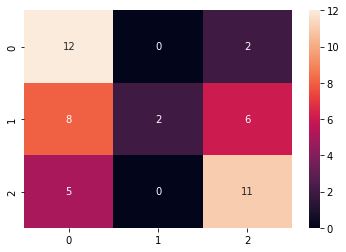

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib as plt
# predict the classes of new, unseen data
# Creates a confusion matrix
cm = confusion_matrix(y_test, yfitGrid)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm)
# plot the confusion matrix
sns.heatmap(cm_df, annot=True, fmt='g')

In [34]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# input the decision tree classifier using "entropy" & train the model
dtree = DecisionTreeClassifier(random_state = 0, criterion = 'entropy').fit(X_train, y_train)

# predict the classes of new, unseen data
predict_dtree = dtree.predict_proba(X_test)
predict_dtree.shape


(46, 3)

In [35]:
#import NB classifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# Instantiate the classifier
gnb = GaussianNB()

# Train classifier
gnb.fit(X_train,y_train)

# Test the classifier
predict_nb = gnb.predict_proba(X_test)
predict_nb.shape


(46, 3)

In [36]:
#import KNN classifier
from sklearn.neighbors import KNeighborsClassifier

#Define k-value
knn=KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)

#Estimate the accuracy of the classifier on test data
predict_knn=knn.predict_proba(X_test)
predict_knn.shape


(46, 3)

ROC Curve & AUC 

In [37]:
!pip install yellowbrick

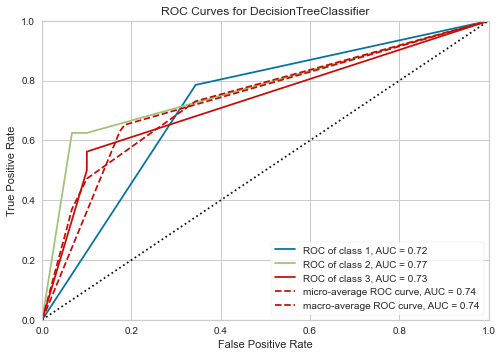

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [39]:
#Decision Tree 
#import module
from yellowbrick.classifier import ROCAUC
# Instaniate the classification model and visualizer
model = DecisionTreeClassifier(random_state = 0, criterion = 'entropy')
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

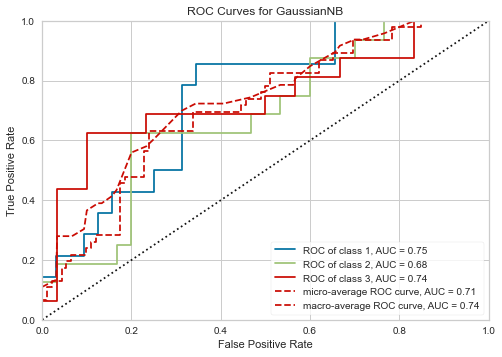

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [40]:
# Instaniate the classification model and visualizer
model = GaussianNB()
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

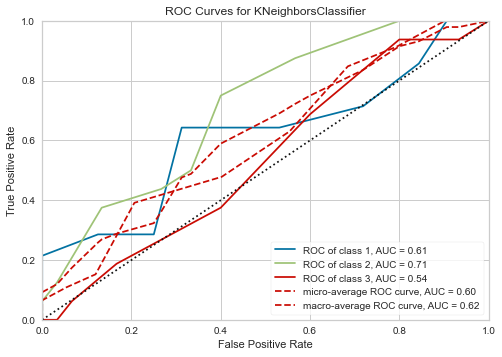

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [41]:
# Instaniate the classification model and visualizer
model = KNeighborsClassifier(n_neighbors=18)
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

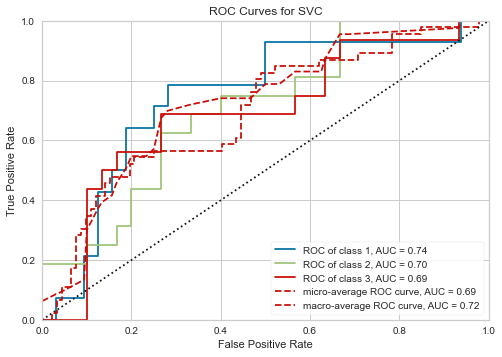

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [42]:
# Instaniate the classification model and visualizer
model = SVC(C= 50, gamma= 0.005, kernel= 'poly')
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

The ROC is a measure of a classifier's predicitve quality, the higher the AUC, the better the model generally is. However, it is also important to examine the gradient of the ROC, as this describes the maximization of the TPR while minizing the FPR. 
In our dataset, the target feature demonstrate a multiclass classification properties, wherein 1,2&3. 
ROC curve is aptly to perform metrics for binary classifiers, while in our case multi-class ROC AUC curvesx, it needs to be addressed by binarizing to 'ovr' or 'ovo' strategies of classifcation. 

Decision model outperforms the other machine learning algorithms in term of area under curve. 